# 1. Imports

In [1]:
# importing other dependencies
import numpy as np
# importing PyTorch
import torch
# importing torch.nn Module
import torch.nn as nn
# plotting
import matplotlib.pyplot as plt

In [2]:
# checks whether MPS is available
print(torch.backends.mps.is_available())

# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

# setting the device to "mps" instead of default "cpu"
device = torch.device("mps" if torch.backends.mps.is_available else "cpu")

True
True


# 2. Linear Regression

## 2.1 Preparing Data

In [97]:
# we create synthetically generated linearly dependent data for linear-regression via sklearn

from sklearn.datasets import make_regression

# extract as numpy
X_numpy, y_numpy = make_regression(n_samples=100, n_features=1, noise=20, random_state=69)

# cast to float pyTorch Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
# reshape y to (n,1) tensor
y = y.view(y.shape[0], 1)

In [98]:
n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')

#samples: 100, #features: 1


In [99]:
# we specify the no. of features and the output dim.
input_dim = n_features
output_dim = 1

# we give out a single no. as output while predicting

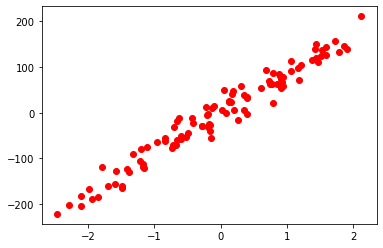

In [100]:
# plotting the data
plt.figure()
plt.plot(X_numpy, y_numpy, 'ro')
plt.show()

In [101]:
# we split the data into training and test split in 8:2 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2.2 Creating the Model

In [107]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define different layers here:
        self.lin = nn.Linear(input_dim, output_dim)
    
    def forward(self, X):
        return self.lin(X)

In [108]:
# initialise linear regression model instance
model = LinearRegression(input_dim, output_dim)

In [109]:
# we also check the initial loss on the test data before training

from sklearn.metrics import mean_squared_error

with torch.no_grad():
    y_test_hat = model(X_test)
    print("Initial Loss on test data:", mean_squared_error(y_test, y_test_hat))

Initial Loss on test data: 7624.091


## 2.3 Training

In [110]:
# in this scenario, we use the MSE Loss, with SGD optimization

# learning rate
lr = 0.01

# no. of epochs
num_epochs = 300

# define loss criterion: MSE loss
criterion = nn.MSELoss()

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# format of optimizer: torch.optim.SGD(weights, lr, ...)

In [111]:
for epoch in range(num_epochs):
    # forward pass:     
    # compute prediction
    y_train_hat = model(X_train)
    # compute loss
    loss = criterion(y_train_hat, y_train)

    # backward pass:
    # compute gradients
    loss.backward()

    # update weights:
    optimizer.step()
    # zero-gradients after updating
    optimizer.zero_grad()


    # output for debugging every 20 loops
    if epoch%50 == 0:
        # unpack the parameters
        [W, b] = model.parameters()
        print("-----------------------")
        print("Epoch#:", epoch)
        print("Weights:", W)
        print("Loss:", loss)

-----------------------
Epoch#: 0
Weights: Parameter containing:
tensor([[3.1768]], requires_grad=True)
Loss: tensor(9981.6250, grad_fn=<MseLossBackward0>)
-----------------------
Epoch#: 50
Weights: Parameter containing:
tensor([[64.5271]], requires_grad=True)
Loss: tensor(1134.9293, grad_fn=<MseLossBackward0>)
-----------------------
Epoch#: 100
Weights: Parameter containing:
tensor([[81.9140]], requires_grad=True)
Loss: tensor(425.7292, grad_fn=<MseLossBackward0>)
-----------------------
Epoch#: 150
Weights: Parameter containing:
tensor([[86.8635]], requires_grad=True)
Loss: tensor(367.7816, grad_fn=<MseLossBackward0>)
-----------------------
Epoch#: 200
Weights: Parameter containing:
tensor([[88.2805]], requires_grad=True)
Loss: tensor(362.9013, grad_fn=<MseLossBackward0>)
-----------------------
Epoch#: 250
Weights: Parameter containing:
tensor([[88.6891]], requires_grad=True)
Loss: tensor(362.4713, grad_fn=<MseLossBackward0>)


## 2.4 Evaluation

In [112]:
# we first find the prediction on the dataset
# attach '.detach()' to make sure this is not part of the computational tree for backpropagation
y_hat = model(X).detach()

# finally also convert to numpy for plotting
y_hat_numpy = y_hat.numpy()

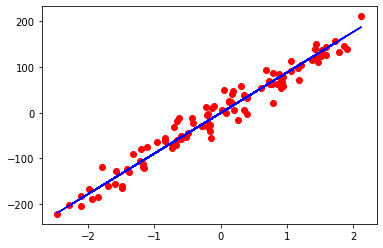

In [113]:
# plotting the linear regression line
plt.figure()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, y_hat_numpy, 'b')
plt.show()

In [114]:
# we also check the final loss on the test data after training

from sklearn.metrics import mean_squared_error

with torch.no_grad():
    y_test_hat = model(X_test)
    print("Final Loss on test data:", mean_squared_error(y_test, y_test_hat))

Final Loss on test data: 549.04376


# 3. Logistic Regression

## 3.1 Preparing Data

In [116]:
# we use the breast cancer dataset, which is a binary classification dataset, where we can use Logistic regression

from sklearn.datasets import load_breast_cancer
# extracted as numpy arrays
X_numpy,y_numpy = load_breast_cancer(return_X_y=True)

print(X_numpy.shape, y_numpy.shape)

(569, 30) (569,)


In [117]:
# before trying Logistic Regression, we first pass the features through Standard Scalar

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_numpy = sc.fit_transform(X_numpy)

In [118]:
# cast to float pyTorch Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
# reshape y to (n,1) tensor
y = y.view(y.shape[0], 1)

In [119]:
n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')

#samples: 569, #features: 30


In [120]:
# we specify the no. of features and the output dim.
input_dim = n_features

# here output dimension is 1, as we predict the class of input by looking at the sigmoid output

In [121]:
# we split the data into training and test split in 8.5:1.5 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

print(X_train.shape, X_test.shape)

torch.Size([483, 30]) torch.Size([86, 30])


## 3.2 Creating the Model

In [130]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        # define different layers here:
        self.linear = nn.Linear(input_dim, 1)
        # here output dim = 1
    
    def forward(self, X):
        # we use sigmoid activation
        y_hat = torch.sigmoid(self.linear(X))
        return y_hat

In [131]:
# initialise linear regression model instance
model = LogisticRegression(input_dim)

In [132]:
# we also check the initial loss on the test data before training

from sklearn.metrics import accuracy_score

with torch.no_grad():
    # this gives the sigmoid output
    y_test_pred = model(X_test)
    # this assigns 1 if sigmoid op is >=0.5 and 0 o.w.
    y_test_hat = y_test_pred.round()
    print("Initial Accuracy on test data:", accuracy_score(y_test, y_test_hat))

Initial Accuracy on test data: 0.3023255813953488


## 3.3 Training

In [133]:
# in this scenario, we use the MSE Loss, with SGD optimization

# learning rate
lr = 0.01

# no. of epochs
num_epochs = 300

# define loss criterion: Binary Cross Entropy loss
criterion = nn.BCELoss()

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# format of optimizer: torch.optim.SGD(weights, lr, ...)

In [134]:
for epoch in range(num_epochs):
    # forward pass:     
    # compute prediction
    y_train_pred = model(X_train)
    # compute loss
    loss = criterion(y_train_pred, y_train)

    # backward pass:
    # compute gradients
    loss.backward()

    # update weights:
    optimizer.step()
    # zero-gradients after updating
    optimizer.zero_grad()


    # output for debugging every 20 loops
    if epoch%50 == 0:
        # unpack the parameters
        print("-----------------------")
        print("Epoch#:", epoch)
        print("Loss:", loss)

-----------------------
Epoch#: 0
Loss: tensor(0.7400, grad_fn=<BinaryCrossEntropyBackward0>)
-----------------------
Epoch#: 50
Loss: tensor(0.3257, grad_fn=<BinaryCrossEntropyBackward0>)
-----------------------
Epoch#: 100
Loss: tensor(0.2424, grad_fn=<BinaryCrossEntropyBackward0>)
-----------------------
Epoch#: 150
Loss: tensor(0.2041, grad_fn=<BinaryCrossEntropyBackward0>)
-----------------------
Epoch#: 200
Loss: tensor(0.1812, grad_fn=<BinaryCrossEntropyBackward0>)
-----------------------
Epoch#: 250
Loss: tensor(0.1656, grad_fn=<BinaryCrossEntropyBackward0>)


## 3.4 Evaluation

In [135]:
# we also check the initial loss on the test data after training

from sklearn.metrics import accuracy_score

with torch.no_grad():
    # this gives the sigmoid output
    y_test_pred = model(X_test)
    # this assigns 1 if sigmoid op is >=0.5 and 0 o.w.
    y_test_hat = y_test_pred.round()
    print("Final Accuracy on test data:", accuracy_score(y_test, y_test_hat))

Final Accuracy on test data: 0.9651162790697675
